# KUIS 2 Machine Learning
## M. Rafy Shah Pahlevi
## 2141720244
## TI-3E / 19

# Import Library

In [6]:
# Impor library yang dibutuhkan
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import zipfile

# Load Dataset

## Load MNIST

In [7]:
from tensorflow.keras.datasets import mnist  # mengimpor dataset mnist dari tensorflow

In [8]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
# memuat data latihan dan pengujian dari dataset MNIST

11490434/11490434 [==============================] - 0s 0us/step


In [9]:
# Check shape data
(train_data.shape, test_data.shape)
# memeriksa bentuk (shape) dan jumlah sampel dari data latihan dan data pengujian

((60000, 28, 28), (10000, 28, 28))

data train memiliki 60.000 sampel gambar latihan, dimana setiap gambar memiliki dimensi 28x28 piksel

sedangkan data test memiliki 10.000 sampel gambar pengujian, dengan memiliki dimensi yang sama dengan data train yaitu 28x28 piksel

In [10]:
# Check shape labels
(train_labels.shape, test_labels.shape)
# memeriksa jumlah sampel gambar dari label data latihan dan data pengujian

((60000,), (10000,))

Jumlah sampel gambar pada data train 60.000, sedangkan pada data test ada 10.000

In [11]:
# Check each data shape --> should be 28*28
train_data[0].shape
# mengecek jumlah pixel pada gambar pertama (pada indeks 0)

(28, 28)

In [12]:
# Check the label
train_labels.shape
# mengecek jumlah sampel gambar pada data train

(60000,)

### Combine Train and Test Data

In [13]:
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])
# menggabungkan data latihan dan data pengujian menjadi satu set data gambar dan label


In [14]:
# Check data shape
digits_data.shape
# karna data train dan data test sudah digabungkan ke variabel digits,
# maka pada variabel digits terdapat 70.000 sampel gambar
# 60.000 dari data train, dan 10.000 dari data test

(70000, 28, 28)

In [15]:
# Check label shape
digits_labels.shape
# jumlah sampel gambar pada data label yaitu 70.000 dari hasil penggabungan sebelumnya

(70000,)

Text(0.5, 1.0, 'Class: 7')

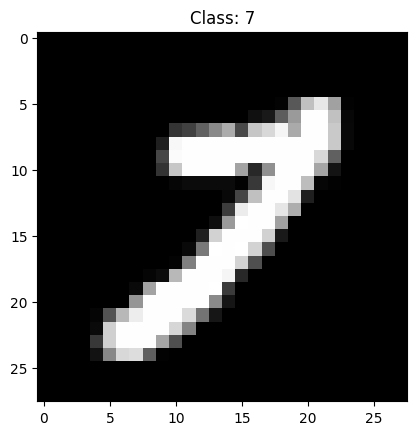

In [16]:
# Randomly checking the data
idx = np.random.randint(0, digits_data.shape[0])
# membuat variabel idx yang berisi indeks acak antara 0 hingga jumlah total gambar dalam dataset

plt.imshow(digits_data[idx], cmap='gray')
# menampilkan gambar yang terletak pada indeks idx dari dataset digits_data dengan skala warna abu-abu

plt.title('Class: ' + str(digits_labels[idx]))
# menambahkan judul pada gambar yang menunjukkan kelas e label dari gambar yang sesuai dengan index


<Axes: xlabel='labels', ylabel='count'>

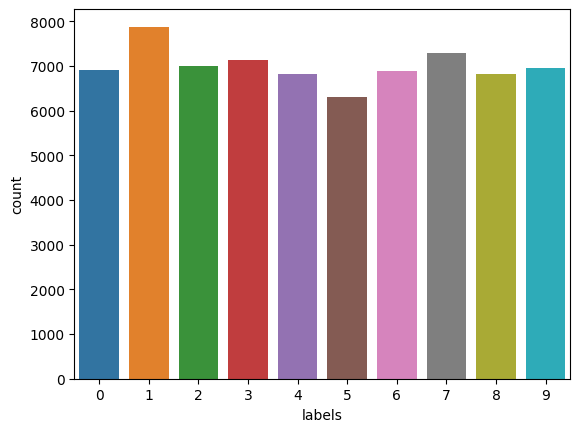

In [17]:
# Check data distribution
df_labels = pd.DataFrame(digits_labels, columns=['labels'])
# membuat DataFrame dari labels digit dan memberi nama kolomnya sebagai 'labels'

sns.countplot(df_labels, x='labels')
# menampilkan plot distribusi data dengan menggunakan seaborn (sns) untuk menghitung dan menampilkan jumlah kemunculan setiap label

## Load Kaggle A-Z

In [18]:
# mendownload zip yang dibutuhkan
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-01 08:12:41--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M   194MB/s    in 1.0s    

2023-12-01 08:12:43 (194 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [19]:
# Extract zip file
zip_object = zipfile.ZipFile(file='alfabeto_A-Z.zip', mode='r')
# membuka file zip dalam mode read

zip_object.extractall('./')
# mengekstrak seluruh isi dari file zip ke dalam direktori saat ini

zip_object.close()
# menutup objek file zip setelah selesai melakukan ekstrak


In [20]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
# membaca file CSV 'A_Z Handwritten Data.csv' sebagai dataset dan mengubah tipe datanya menjadi float32

dataset_az
# menampilkan dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Get pixel data only
alphabet_data = dataset_az.drop('0', axis=1)
# mengambil data piksel dengan menghapus kolom '0' (kolom yang berisi label) dari dataset_az

# Get labels only
alphabet_labels = dataset_az['0']
# mengambil hanya kolom '0' (kolom yang berisi label) sebagai data label dari dataset_az

In [22]:
# Check shape data
alphabet_data.shape, alphabet_labels.shape
# mencek kembali jumlah sampel gambar dan piksel nya

((372450, 784), (372450,))

In [23]:
# Check shape labels
alphabet_labels.shape
# cek jumlah sampel gambar

(372450,)

In [24]:
# Reshape pixel data to 28*28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# mereshape data piksel menjadi format 28x28 piksel per gambar

# Check the result by its shape
alphabet_data.shape
# memeriksa hasil dari perubahan dimensi data piksel menjadi 28x28 piksel per gambar

(372450, 28, 28)

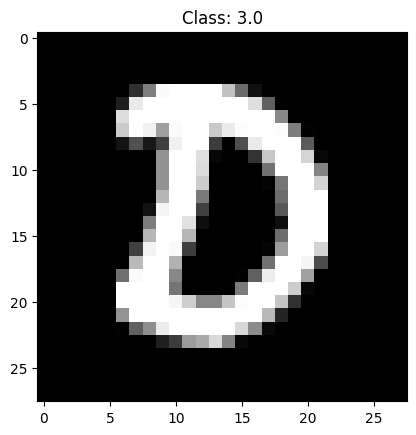

In [25]:
# Randomly checking A-Z dataset
index = np.random.randint(0, alphabet_data.shape[0])
# membuat variabel idx yang berisi indeks acak antara 0 hingga jumlah total gambar dalam dataset

plt.imshow(alphabet_data[index], cmap = 'gray')
# menampilkan gambar yang terletak pada indeks idx dari dataset digits_data dengan skala warna abu-abu

plt.title('Class: ' + str(alphabet_labels[index]));
# menambahkan judul pada gambar yang menunjukkan kelas e label dari gambar yang sesuai dengan index

<Axes: xlabel='Labels', ylabel='count'>

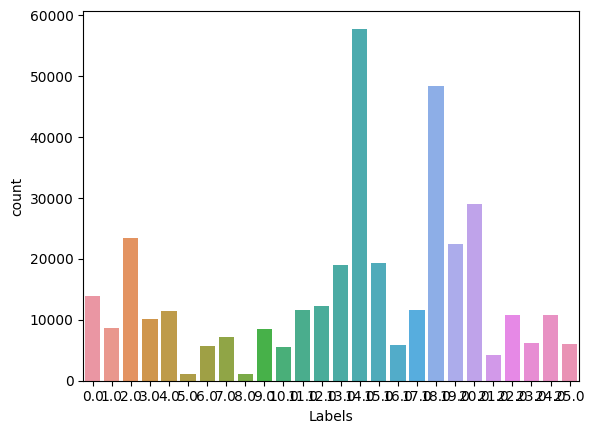

In [26]:
# Check data distribution
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})
sns.countplot(df_az_labels, x='Labels')
# menampilkan plot distribusi data untuk dataset A-Z yang berisi jumlah kemunculan setiap label

## Combine Dataset (MNIST + Kaggel A-Z)

In [27]:
# Check unique value from digits_labels
np.unique(digits_labels)
# menampilkan nilai unik yang terdapat dalam array digits_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [28]:
# Check unique value from alphabet_labels
np.unique(alphabet_labels)
# menampilkan nilai unik yang terdapat dalam array alphabet_labels

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [29]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10
# menambahkan nilai 10 pada setiap elemen dalam alphabet_labels

In [30]:
# check alphabet labels again
np.unique(alphabet_labels)
# menampilkan nilai unik yang terdapat dalam array alphabet_labels

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [31]:
# Combine both of them
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])
# menggabungkan kedua dataset, baik data piksel maupun labelnya

In [32]:
# Check the shape
data.shape, labels.shape
# menampilkan bentuk shape dari data dan label yang telah digabungkan

((442450, 28, 28), (442450,))

In [33]:
# Check labels
np.unique(labels)
# menampilkan nilai unik yang terdapat dalam array labels yang sudah digabungkan

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [34]:
# Convert data to float32
data = np.array(data, dtype='float32')
# mengubah tipe data dari array 'data' menjadi float32


In [35]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1)
# menambahkan "kedalaman" (depth) ke dalam data menggunakan np.expand_dims

# check shape
data.shape
# memeriksa bentuk (shape) dari data setelah ditambahkan depth

(442450, 28, 28, 1)

# Preprocessing

In [36]:
# Normalize data
data /= 255.0
# melakukan normalisasi data dengan membagi setiap elemen dalam data dengan nilai 255.0

In [37]:
# Check range value of data
data[0].min(), data[0].max()
# mencari nilai minimum dan maksimum dari elemen pertama di dataset data

(0.0, 1.0)

In [38]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
le = LabelBinarizer()
# membuat objek "le" LabelBinarizer yang akan digunakan untuk melakukan transformasi label.
labels = le.fit_transform(labels)
# mengonversi variabel 'labels' menjadi format biner menggunakan fit_transform() dari LabelBinarizer

In [39]:
# Check labels shape
labels.shape
# untuk mengetahui bentuk (shape) dari variabel 'labels'

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

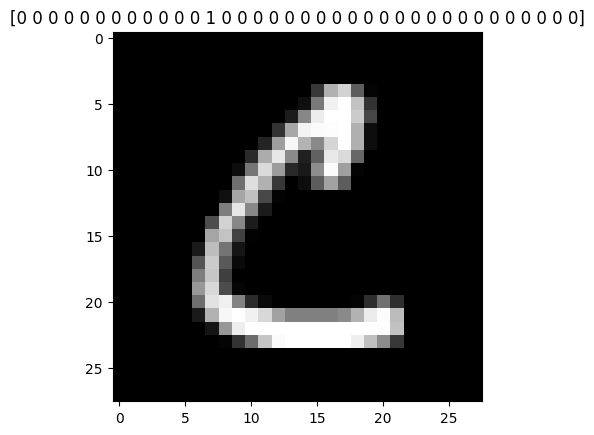

In [40]:
# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[30000]))
# menampilkan gambar dari data pada indeks ke-30000 dengan skala warna abu-abu
# dan menunjukkan label yang sesuai dari variabel labels pada indeks yang sama sebagai judul gambar

In [41]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0)
# menghitung jumlah total masing-masing kelas dengan menjumlahkan nilai pada setiap kolom (kelas) dari variabel labels

classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [42]:
# Check the biggest value of data
classes_total.max()
# mengecek nilai terbesar dalam array classes_total

57825

In [43]:
# Create a weight for each data
classes_weights = {}
# untuk menyimpan "bobot" untuk setiap class.
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]
  #  digunakan untuk memeriksa setiap class dalam dataset
# Check the weight for each data
classes_weights
# untuk menyimpan bobot dari hasil perbandingan tiap class

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

# Split Data to Train and Test

In [44]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)
# melakukan pemisahan dataset menjadi dua bagian, yaitu data latih (untuk melatih model) dan data uji (untuk menguji model)
# juga memastikan bahwa distribusi kelas dalam data latih dan data uji sama seperti yang ada di dataset aslinya

## Create Data Augmentation

In [45]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [46]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)
# untuk mengubah gambar-gambar dalam proses pelatihan model, seperti merotasi, zoom, dan lain lain

# Build CNN Model

In [47]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [48]:
# Build the network
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

network.add(Dense(36, activation='softmax'))

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# kode diatas adalah pendefinisian untuk membuat Convulitonal Neural Network (CNN)
# dengan tujuan untuk melakukan klasifikasi pada gambar-gambar dengan ukuran 28x28 piksel yang terbagi dalam 36 kelas yang berbeda.

In [49]:
# Check network summary
network.summary()
# menampilkan ringkasan dari network cnn yang telah dibuat sebelumnya

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [50]:
# Create actual labels
name_labels = '0123456789'  # inisialisasi string dengan angka dari 0 hingga 9

# menambahkan karakter alfabet dari A-Z ke dalam string name_labels
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# mengonversi string name_labels menjadi list dengan setiap karakter sebagai elemen
name_labels = [l for l in name_labels]

# Check actual label
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## Train model

In [51]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model' # nama file untuk menyimpan model setelah pelatihan selesai
epochs = 20 # jumlah iterasi ketika melatih model
batch_size = 128 # jumlah sampel data yang digunakan untuk menghitung nilai gradient

In [52]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)
# untuk menyimpan model saat melatih neural network

In [53]:
# Fit the model
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),  # melatih model dengan data augmentasi
                      validation_data=(X_test, y_test),  # data validasi
                      steps_per_epoch=len(X_train) // batch_size,  # langkah per epoch (jumlah batch per epoch)
                      epochs=epochs,  # jumlah epoch
                      class_weight=classes_weights,  # Bobot class jika terjadi ketidakseimbangan class
                      verbose=1,  # nenampilkan informasi detail saat melatih
                      callbacks=[checkpointer])  # menggunakan callback checkpointer untuk menyimpan model terbaik


Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 2.1961 - accuracy: 0.8232
Epoch 1: val_loss improved from inf to 0.30085, saving model to custom_ocr.model
2765/2765 [==============================] - 153s 52ms/step - loss: 2.1961 - accuracy: 0.8232 - val_loss: 0.3009 - val_accuracy: 0.8710
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 0.9961 - accuracy: 0.8991
Epoch 2: val_loss improved from 0.30085 to 0.26588, saving model to custom_ocr.model
2765/2765 [==============================] - 136s 49ms/step - loss: 0.9961 - accuracy: 0.8991 - val_loss: 0.2659 - val_accuracy: 0.8934
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8252 - accuracy: 0.9122
Epoch 3: val_loss improved from 0.26588 to 0.14553, saving model to custom_ocr.model
2765/2765 [==============================] - 125s 45ms/step - loss: 0.8252 - accuracy: 0.9122 - val_loss: 0.1455 - val_accuracy: 0.9540
Epoch 4/20
2764/2765 [=========================

# Evaluate Model

## Make a Single Prediction

In [54]:
# make a prediction
predictions = network.predict(X_test, batch_size=batch_size)
# melakukan prediksi menggunakan model pada data X_test
# hasil prediksi akan disimpan dalam variabel 'predictions'

692/692 [==============================] - 2s 2ms/step


In [55]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[1]

# menampilkan prediksi pada indeks ke-1

array([1.74369699e-19, 7.49658834e-16, 1.13118976e-12, 2.52451701e-24,
       3.26564288e-19, 7.96393252e-15, 1.12920593e-17, 7.29301720e-16,
       3.99451722e-18, 2.05714749e-21, 2.11255060e-16, 3.47318746e-17,
       1.20539239e-13, 3.78079457e-10, 6.02846223e-15, 9.34643767e-15,
       3.83527286e-15, 1.35485346e-13, 9.99998450e-01, 1.53020665e-06,
       2.61556578e-17, 2.64125305e-10, 2.94499131e-25, 1.30349156e-17,
       8.73719012e-13, 4.24379819e-17, 2.50359606e-20, 9.95173806e-22,
       5.45696951e-12, 1.39119374e-08, 1.48120025e-12, 6.72615751e-23,
       3.23493122e-19, 6.89813934e-19, 3.02441889e-14, 5.41000723e-14],
      dtype=float32)

In [56]:
# Get the actual prediction -> highest probability
np.argmax(predictions[1])
# menampilkan prediksi dengan probabilitas tertinggi

18

In [57]:
# Check label for 24
name_labels[18] # menampilkan label pada indeks ke-18

'I'

In [58]:
# Check y_test label for 0
y_test[1]
# menampilkan isi label pada indeks ke-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [59]:
# check the highest value
np.argmax(y_test[1])
# menampilkan label dengan nilai terbesar pada indeks ke-1

18

In [60]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[18])]
# menampilkan label dari y_test indeks ke-18

'S'

## Make an Evaluation on Test Data

In [61]:
# Evaluate on test data
network.evaluate(X_test, y_test)
# untuk mengevaluasi performa model neural network pada data uji, seperti nilai loss dll

2766/2766 [==============================] - 10s 3ms/step - loss: 0.1878 - accuracy: 0.9211


[0.18775324523448944, 0.921064555644989]

In [62]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))
#  mencetak laporan klasifikasi yang menyajikan sejumlah metrik evaluasi seperti presisi (precision), recall,
#dan nilai F1 untuk setiap kelas atau label yang ada dalam data uji.

              precision    recall  f1-score   support

           0       0.21      0.82      0.33      1381
           1       0.96      0.99      0.98      1575
           2       0.87      0.99      0.92      1398
           3       0.96      0.99      0.98      1428
           4       0.90      0.97      0.94      1365
           5       0.64      0.95      0.77      1263
           6       0.95      0.97      0.96      1375
           7       0.96      0.99      0.97      1459
           8       0.92      0.99      0.95      1365
           9       0.97      0.96      0.97      1392
           A       1.00      0.99      0.99      2774
           B       0.96      0.99      0.97      1734
           C       1.00      0.97      0.98      4682
           D       0.90      0.97      0.93      2027
           E       1.00      0.98      0.99      2288
           F       0.97      1.00      0.98       233
           G       0.94      0.96      0.95      1152
           H       0.99    

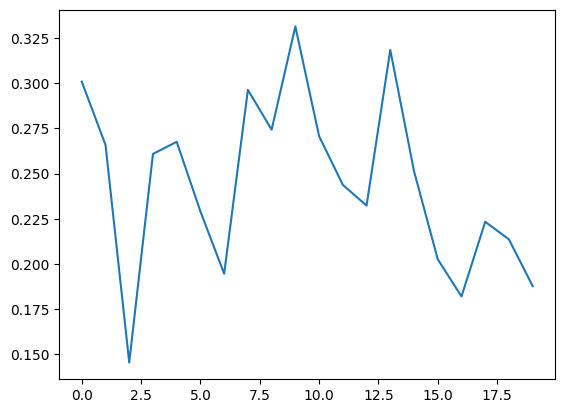

In [63]:
# Visualize loss value for each epoch
plt.plot(history.history['val_loss'])
# membuat visualisasi dari nilai loss pada data validasi (val_loss) selama proses pelatihan model

In [64]:
# You can also check the another metrics
history.history.keys()
# untuk mengcek metriks yang lain

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

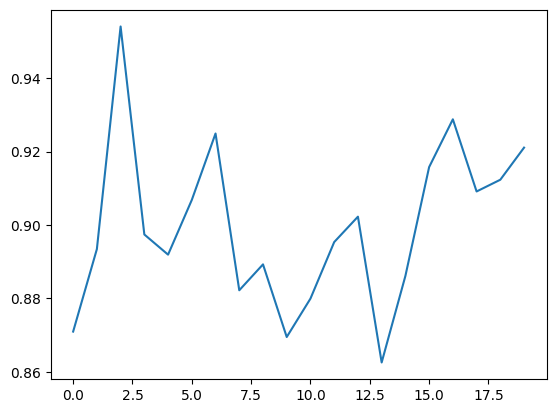

In [65]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy'])
# visualisasi dari metrik akurasi pada data validasi (val_accuracy) selama proses pelatihan model

# Save The Model

In [66]:
# The result will show in colab directory
network.save('network', save_format= 'h5')
# mensimpan hasil modelnya

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing on Real Image

In [67]:
# Import library
from tensorflow.keras.models import load_model

In [68]:
# Load saved network
load_network = load_model('network')
# menload kembali network yang telah tersimpan

In [69]:
# Check summary
load_network.summary()
# menampilkan lagi network yang telah dibuat sebelumnya

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

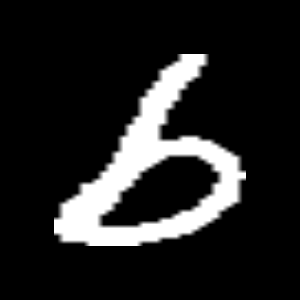

In [70]:
# Load Image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/sample_data/b_small.png')
cv2_imshow(img)

# membaca gambar pada direktori dan menyimpannya ke img

In [71]:
# Check shape
img.shape
# untuk mengecek shape seperti tinggi lebar nya gambar, 3 merupakan warna yang ada pada gambar diatas

(300, 300, 3)

In [72]:
# Convert to gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# check shape
gray_img.shape

# mengubah gambar menjadi abu-abu dan cek shapenya lagi

(300, 300)

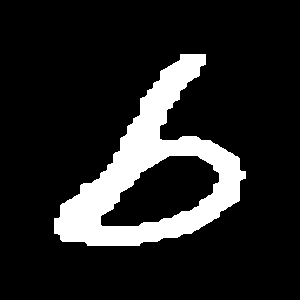

120.0


In [73]:
# Pre-process
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)
# melakukan thresholding pada gambar dengan metode Otsu.

# print threshold value
print(value)

In [74]:
# Resize image in order to match network input shape -> 28*28
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

# mengubah gambar menjadi 28x28 piksel

In [75]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # also perform normalization
img_input = np.expand_dims(img_input, axis=-1) # insert depth

# check shape
img_input.shape

(28, 28, 1)

In [76]:
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

(1, 28, 28, 1)

In [77]:
# Make a predition
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # predict actual label
pred_label

1/1 [==============================] - 0s 157ms/step


6

In [78]:
# check label for 6
name_labels[6]

'6'


Dengan memanfaatkan model CNN yang telah dilatih menggunakan dataset MNIST dan dataset A-Z dari Kaggle, berhasil mendapatkan prediksi yang akurat untuk gambar huruf "b" yang diubah menjadi huruf "G". Dalam kasus ini, model mampu mengidentifikasi gambar tersebut sebagai label 6.

Hasil ini menunjukkan bahwa model CNN yang dilatih mampu mengenali pola-pola penting dari data yang digunakan dalam pelatihan. Dengan demikian, model ini dapat dengan baik mengklasifikasikan gambar-gambar baru yang tidak terlihat sebelumnya dengan akurasi yang baik.